In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
file_path = "Downloads/CLOUDTHAT_FOLDER/Vehicle_Sales_2024_CSV.csv"
df = pd.read_csv(file_path)

In [6]:
df.head()

,slno,model_desc,fuel,colour,vehicle_class,make_year,seat_capacity,second_vehicle,temp_registration_number,category,maker_name,office_cd,from_date,vehicle_age,group
0,1,MARUTI TOUR M(O) CNG 1.5L 5MT BSVI-PH2,CNG PETROL,PEARL ARCTIC WHITE,MOTOR CAB,01-12-2023,7,N,TS24NTR9216,Transport,"MARUTI SUZUKI INDIA LTD.,",RTA KHAMMAM,01-01-2024,1,Traditional
1,2,TVS XL100 HEAVY DUTY I-TOUCH START BSVI-PH2,PETROL,DBLU,MOTOR CYCLE,01-10-2023,2,N,TS02BJTR1342,Non Transport,TVS MOTOR COMPANY LTD,UNIT OFFICE RAMAGUNDAM,01-01-2024,1,Traditional
2,3,ACTIVA 125 DISC BSVI-PH2,PETROL,PEARL NIGHTSTAR BLAC,MOTOR CYCLE,01-11-2023,2,N,TS04APTR5126,Non Transport,HONDA MOTORCYCLE&SCOOTER(I)P L,RTA KHAMMAM,01-01-2024,1,Traditional
3,4,TVS ZEST BSVI-PH2,PETROL,MATTE BLACK,MOTOR CYCLE,01-10-2023,2,N,TS09GMTR6782,Non Transport,TVS MOTOR COMPANY LTD,RTA UPPAL,01-01-2024,1,Traditional
4,5,LS1510.3T6RB 5200 WB 40+D BSVI-PH2,DIESEL,WHITE,OMINIBUS,01-08-2023,41,N,TS10CCTR7431,Transport,ASHOK LEYLAND LTD,RTA-HYDERABAD-EZ,01-01-2024,1,Traditional


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985474 entries, 0 to 985473
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   slno                      985474 non-null  int64 
 1   model_desc                985474 non-null  object
 2   fuel                      971846 non-null  object
 3   colour                    985102 non-null  object
 4   vehicle_class             985474 non-null  object
 5   make_year                 985474 non-null  object
 6   seat_capacity             985474 non-null  int64 
 7   second_vehicle            985474 non-null  object
 8   temp_registration_number  985474 non-null  object
 9   category                  985474 non-null  object
 10  maker_name                985474 non-null  object
 11  office_cd                 985474 non-null  object
 12  from_date                 985474 non-null  object
 13  vehicle_age               985474 non-null  int64 
 14  grou

In [11]:
print(df.describe())

                slno  seat_capacity    vehicle_age
count  985474.000000  985474.000000  985474.000000
mean   492739.299547       2.752555       0.720825
std    284483.510080       2.775953       0.496067
min         1.000000       0.000000       0.000000
25%    246369.250000       2.000000       0.000000
50%    492738.500000       2.000000       1.000000
75%    739109.750000       2.000000       1.000000
max    985478.000000      63.000000       5.000000


In [13]:
print(df.isnull().sum())

slno                            0
model_desc                      0
fuel                        13628
colour                        372
vehicle_class                   0
make_year                       0
seat_capacity                   0
second_vehicle                  0
temp_registration_number        0
category                        0
maker_name                      0
office_cd                       0
from_date                       0
vehicle_age                     0
group                           0
dtype: int64


In [15]:
print(df.fillna("N/A", inplace=True))

None


In [20]:
df['from_date'] = pd.to_datetime(df['from_date'], errors='coerce')

# Create month column
df['month'] = df['from_date'].dt.to_period('M').astype(str)

In [22]:
# Group by month
monthly_reg = df.groupby('month').size().reset_index(name='registrations')

# Ensure data types
monthly_reg['registrations'] = pd.to_numeric(monthly_reg['registrations'], errors='coerce')

In [26]:
# Extract day
df['day'] = df['from_date'].dt.date  

In [28]:
#EDA — Summary Statistics
print("\nSummary Statistics:")
print(df[['seat_capacity', 'vehicle_age']].describe())


Summary Statistics:
       seat_capacity    vehicle_age
count  985474.000000  985474.000000
mean        2.752555       0.720825
std         2.775953       0.496067
min         0.000000       0.000000
25%         2.000000       0.000000
50%         2.000000       1.000000
75%         2.000000       1.000000
max        63.000000       5.000000


In [30]:
# Frequency Tables
print("\nFuel Type Distribution:")
print(df['fuel'].value_counts())


Fuel Type Distribution:
fuel
PETROL             748986
DIESEL             109185
BATTERY             73308
CNG PETROL          28296
N/A                 13628
PETROL LPG           9984
CNG                  1766
PETROL ELECTRIC       320
LPG                     1
Name: count, dtype: int64


In [32]:
print("\nVehicle Type (EV/Traditional):")
print(df['vehicle_class'].value_counts())


Vehicle Type (EV/Traditional):
vehicle_class
MOTOR CYCLE                                   690678
MOTOR CAR                                     151544
AUTO RICKSHAW                                  34612
GOODS CARRIAGE                                 23560
TRACTOR FOR AGRICULTURAL PURPOSE               20598
MOTOR CAB                                      17720
THREE WHEELED GOODS VEHICLE                     7798
TRACTOR FOR COMMERCIAL USE                      7733
TRAILER FOR AGRICULTURE PURPOSE                 7368
TRAILER FOR COMMERCIAL USE                      6776
CHASSIS TRANSPORT                               5253
OMINIBUS                                        3828
MOTOR CYCLE FOR HIRE                            2764
VEHICLE FITTED WITH CONSTRUCTION EQUIPMENT      1237
OMNIBUS FOR PRIVATE USE                         1217
MAXI CAB                                         829
AMBULANCE                                        695
TRACTOR DRIVEN COMBINED HARVESTER                333


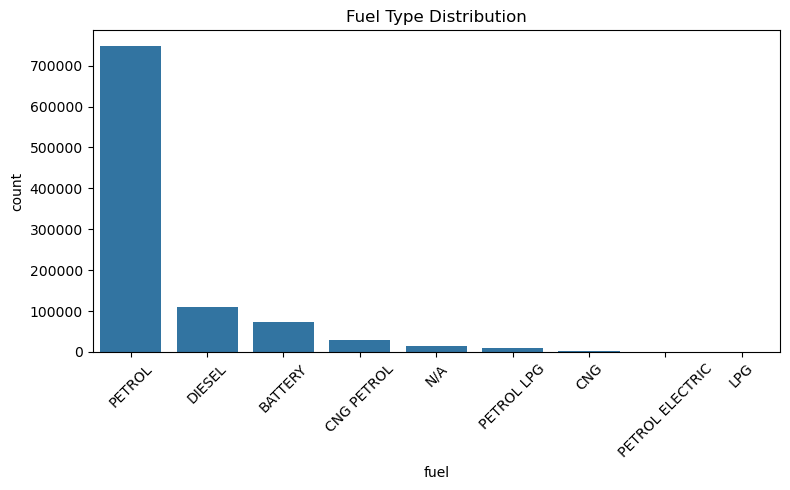

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='fuel', order=df['fuel'].value_counts().index)
plt.title("Fuel Type Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

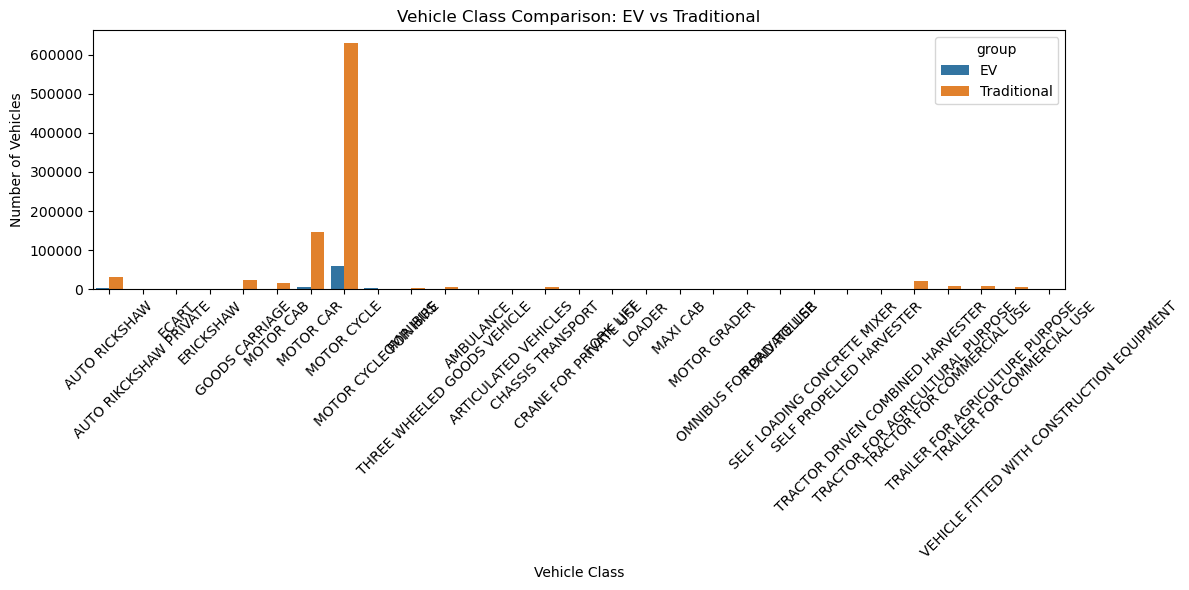

In [36]:
grouped_data = df.groupby(['group', 'vehicle_class']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='vehicle_class', y='count', hue='group')
plt.title("Vehicle Class Comparison: EV vs Traditional")
plt.xlabel("Vehicle Class")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

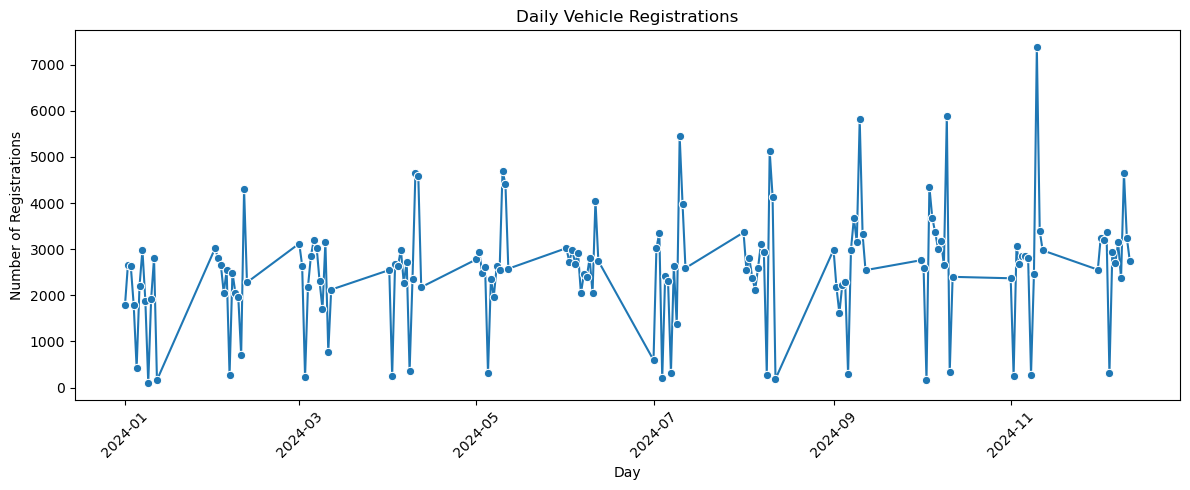

In [38]:
# Group by day
daily_reg = df.groupby('day').size().reset_index(name='registrations')

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_reg, x='day', y='registrations', marker='o')
plt.title("Daily Vehicle Registrations")
plt.xlabel("Day")
plt.ylabel("Number of Registrations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

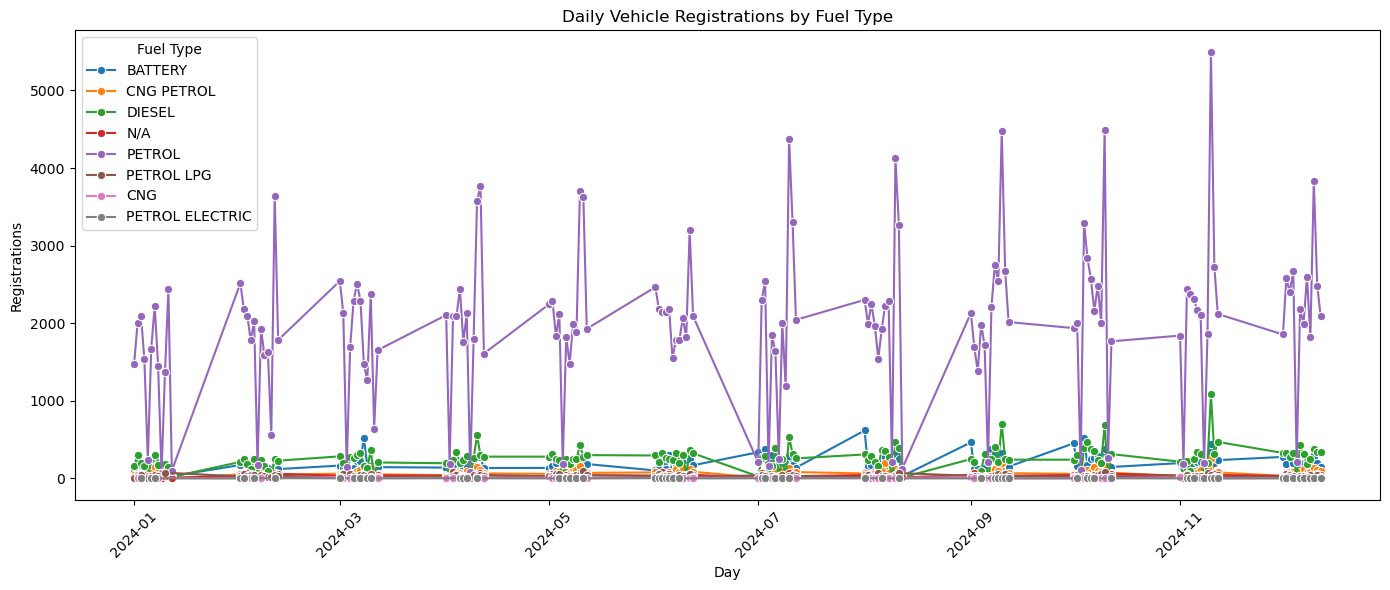

In [40]:
# Group by day and fuel
daily_fuel = df.groupby(['day', 'fuel']).size().reset_index(name='registrations')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_fuel, x='day', y='registrations', hue='fuel', marker='o')
plt.title("Daily Vehicle Registrations by Fuel Type")
plt.xlabel("Day")
plt.ylabel("Registrations")
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

In [48]:
print(df['fuel'].value_counts())


fuel
PETROL             748986
DIESEL             109185
BATTERY             73308
CNG PETROL          28296
N/A                 13628
PETROL LPG           9984
CNG                  1766
PETROL ELECTRIC       320
LPG                     1
Name: count, dtype: int64


In [56]:
top_makers = df['maker_name'].value_counts().nlargest(5).index
df_top_makers = df[df['maker_name'].isin(top_makers)]

In [58]:
top_makers

Index(['HONDA MOTORCYCLE&SCOOTER(I)P L', 'BAJAJ AUTO LTD',
       'TVS MOTOR COMPANY LTD', 'HERO MOTOCORP LTD',
       'MARUTI SUZUKI INDIA LTD.,'],
      dtype='object', name='maker_name')

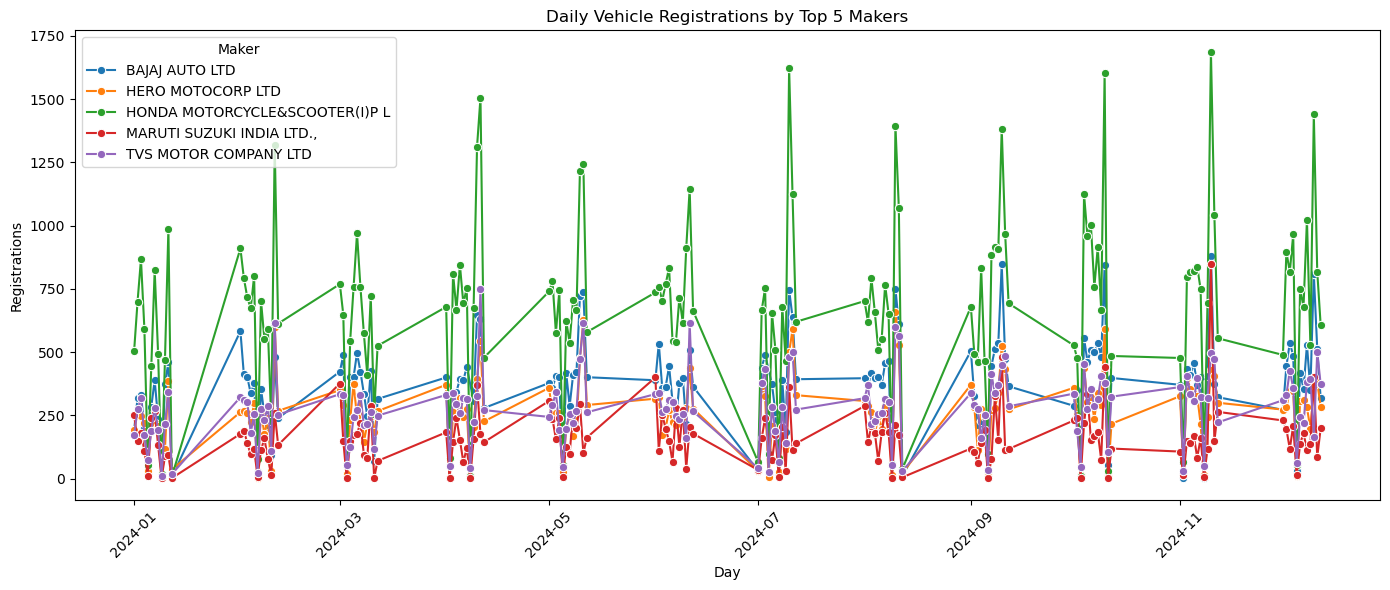

In [60]:
daily_maker = df_top_makers.groupby(['day', 'maker_name']).size().reset_index(name='registrations')

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_maker, x='day', y='registrations', hue='maker_name', marker='o')
plt.title("Daily Vehicle Registrations by Top 5 Makers")
plt.xlabel("Day")
plt.ylabel("Registrations")
plt.xticks(rotation=45)
plt.legend(title='Maker')
plt.tight_layout()
plt.show()

In [62]:
df['colour'] = df['colour'].str.strip()

In [64]:
df['colour'] = df['colour'].replace({
    'MET BLUE': 'METALLIC BLUE',
    'MET. BLUE': 'METALLIC BLUE',
    'RED/WHITE': 'RED & WHITE',
    'WHITE/RED': 'RED & WHITE',
    'BLK': 'BLACK',
    'BLK/RED': 'BLACK & RED'
})

In [66]:
# Get unique colour values
unique_colours = df['colour'].value_counts().reset_index()
unique_colours.columns = ['raw_colour', 'count']

# Display result
print(unique_colours)

                               raw_colour  count
0                                   BLACK  51383
1                           GOLDEN YELLOW  31474
2                                P S BLUE  27507
3                    PEARL PRECIOUS WHITE  18320
4                      PEARL ARCTIC WHITE  17294
...                                   ...    ...
10596  POLAR WHITE-DUAL TONE-ZESTY ORANGE      1
10597             SUNLIT YELLOW-DUAL TONE      1
10598                      ORANGE & CREEM      1
10599                               T.GRE      1
10600          GALLENT RED+MIDNIGHT BLACK      1

[10601 rows x 2 columns]


In [68]:
# Get top 5 colours
top_5_colours = unique_colours.head(5)

print("\nTop 5 Colours:")
print(top_5_colours)


Top 5 Colours:
             raw_colour  count
0                 BLACK  51383
1         GOLDEN YELLOW  31474
2              P S BLUE  27507
3  PEARL PRECIOUS WHITE  18320
4    PEARL ARCTIC WHITE  17294


In [70]:
# Filter only EVs
ev_df = df[df['group'].str.contains("EV")]

# Count colours used in EVs
ev_colour_counts = ev_df['colour'].value_counts().reset_index()
ev_colour_counts.columns = ['colour', 'count']

# Display all or just top 10
print("Top EV Colours:")
print(ev_colour_counts.head(10))

Top EV Colours:
           colour  count
0   MIDNIGHT BLUE   5414
1   LIQUID SILVER   4112
2      SPACE GREY   2579
3           WHITE   2479
4          T GREY   2461
5    MERCURY GREY   2391
6           BLACK   1983
7    ARTICT WHITE   1722
8  BROOKLYN BLACK   1549
9            GREY   1519


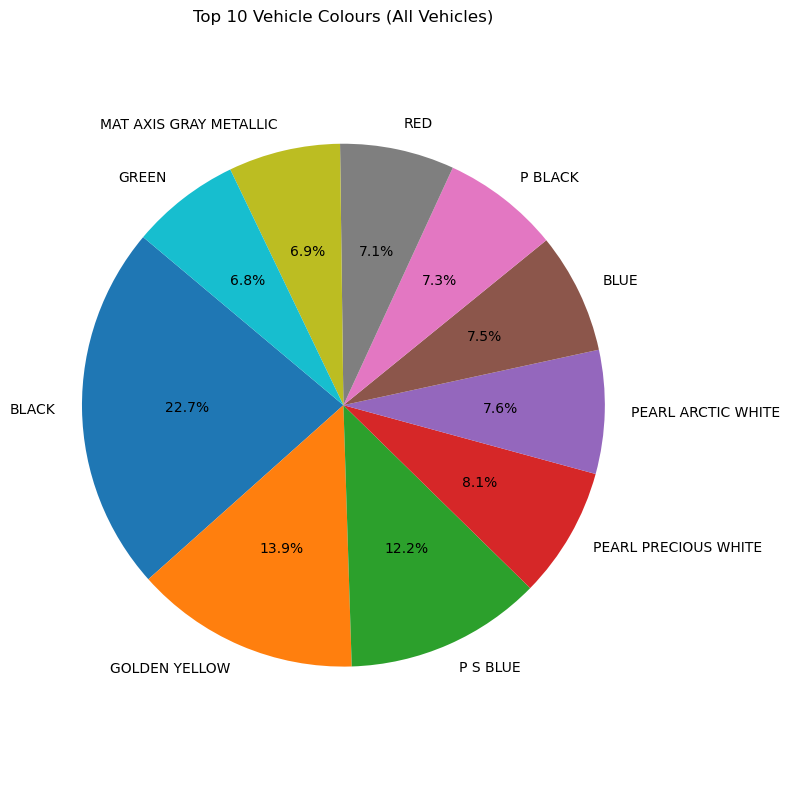

In [72]:
top_colours = df['colour'].value_counts().head(10)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_colours, labels=top_colours.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Vehicle Colours (All Vehicles)")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.tight_layout()
plt.show()

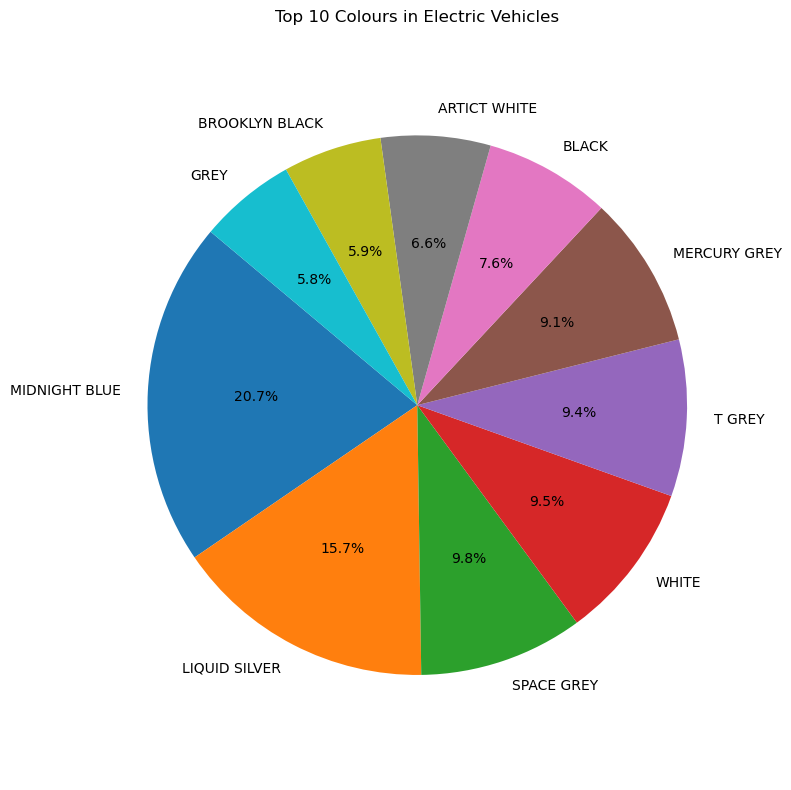

In [78]:
ev_df = df[df['group'].str.contains("EV")]

# Count colour distribution for EVs
ev_colour_counts = ev_df['colour'].value_counts().head(10)  

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(ev_colour_counts, labels=ev_colour_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Colours in Electric Vehicles")
plt.axis('equal') 
plt.tight_layout()
plt.show()

In [ ]:
# SQL Insights in Python

In [82]:
# Extract year and month for grouping
df['year'] = df['from_date'].dt.year
df['month'] = df['from_date'].dt.month
df['year_month'] = df['from_date'].dt.to_period('M').astype(str)


In [84]:
#Top 5 Manufacturers Per Year
top5_makers = (
    df.groupby(['year', 'maker_name'])
    .size()
    .reset_index(name='total_registrations')
    .sort_values(['year', 'total_registrations'], ascending=[True, False])
    .groupby('year')
    .head(5)
)

print(top5_makers)


       year                      maker_name  total_registrations
71   2024.0  HONDA MOTORCYCLE&SCOOTER(I)P L                96990
13   2024.0                  BAJAJ AUTO LTD                52073
488  2024.0           TVS MOTOR COMPANY LTD                39967
68   2024.0               HERO MOTOCORP LTD                37295
357  2024.0       MARUTI SUZUKI INDIA LTD.,                22746


In [86]:
#Fuel-Type Sales Distribution Across Registration Office
fuel_office = (
    df.groupby(['office_cd', 'fuel'])
    .size()
    .reset_index(name='total_registrations')
    .sort_values(['office_cd', 'total_registrations'], ascending=[True, False])
)

print(fuel_office)

                 office_cd        fuel  total_registrations
4             RTA ADILABAD      PETROL                 8609
2             RTA ADILABAD      DIESEL                 1183
0             RTA ADILABAD     BATTERY                  533
3             RTA ADILABAD         N/A                  150
1             RTA ADILABAD  CNG PETROL                   46
..                     ...         ...                  ...
372  UNIT OFFICE ZAHIRABAD      PETROL                 6530
370  UNIT OFFICE ZAHIRABAD      DIESEL                  436
368  UNIT OFFICE ZAHIRABAD     BATTERY                  123
369  UNIT OFFICE ZAHIRABAD  CNG PETROL                  121
371  UNIT OFFICE ZAHIRABAD         N/A                   27

[373 rows x 3 columns]


In [88]:
#Detect Spikes Before Financial Year-End

monthly_trend = (
    df.groupby('year_month')
    .size()
    .reset_index(name='registrations')
    .sort_values('year_month')
)

print(monthly_trend)

   year_month  registrations
0     2024-01          21359
1     2024-02          27156
2     2024-03          27305
3     2024-04          30209
4     2024-05          32320
5     2024-06          32870
6     2024-07          28233
7     2024-08          31592
8     2024-09          33080
9     2024-10          34345
10    2024-11          33358
11    2024-12          34473
12        NaT         619174


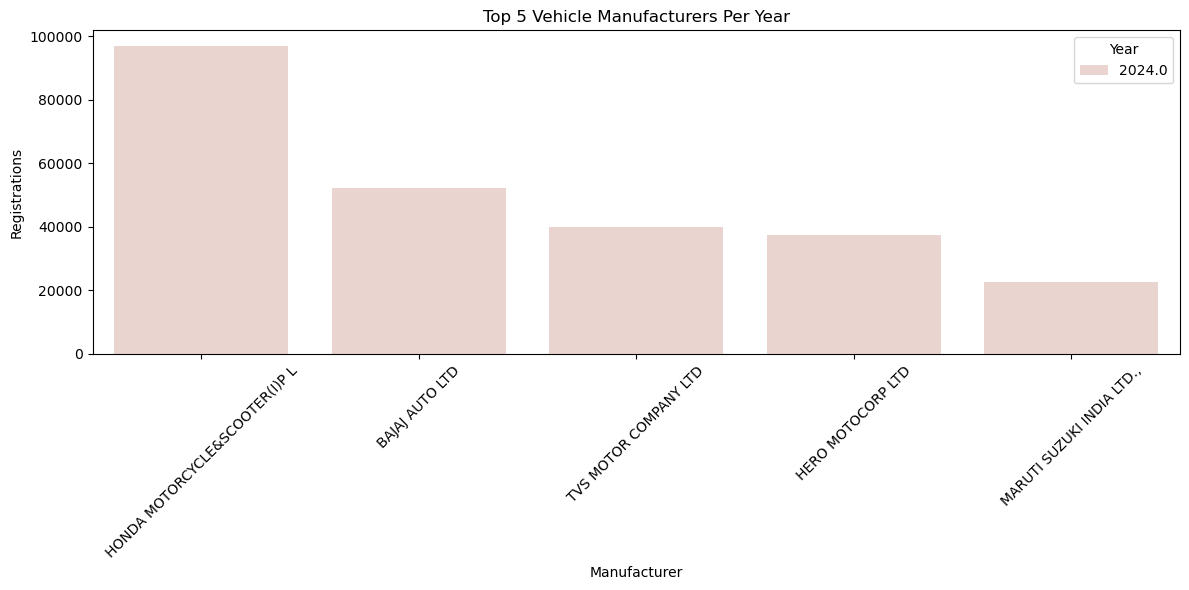

In [90]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_makers, x='maker_name', y='total_registrations', hue='year')
plt.title("Top 5 Vehicle Manufacturers Per Year")
plt.xlabel("Manufacturer")
plt.ylabel("Registrations")
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [ ]:
# top 5 registration offices per year
top5_ev_makers = (
    ev_df.groupby(['year', 'office_cd'])
    .size()
    .reset_index(name='total_registrations')
    .sort_values(['year', 'total_registrations'], ascending=[True, False])
    .groupby('year')
    .head(5))

plt.figure(figsize=(12, 6))
sns.barplot(data=top5_ev_makers, x='office_cd', y='total_registrations', hue='year')
plt.title("Top 5 EV Registration Offices Per Year")
plt.xlabel("Manufacturer")
plt.ylabel("EV Registrations")
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()